<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module2/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

Цей блокнот містить огляд **matplotlib.pyplot**, середовища візуалізації для Python.


## Матеріали
Цей підручник базується на:

- Офіційний [посібник із використання Matplotlib](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)
- Офіційний [Pyplot tutorial1](https://matplotlib.org/users/pyplot_tutorial.html) і [Pyplot tutorial2](https://matplotlib.org/tutorials/introductory/pyplot.html) Matplotlib. Дивіться також їх
[Сторінка підручників](https://matplotlib.org/tutorials/index.html), яка містить додаткові поглиблені підручники, і їх [галерея](https://matplotlib.org/tutorials/introductory/sample_plots.html) прикладів ділянок.
- Розділ 4 *Посібника з науки про дані Python* Джейка ВандерПласа про [Візуалізацію за допомогою Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#4.-Visualization-with-Matplotlib)
- Stanford CSE231n [Навчальний посібник Python Numpy](https://cs231n.github.io/python-numpy-tutorial/#matplotlib)

## Про цей блокнот

Цей блокнот взято з вищезазначених джерел. Оновлення були написані професором Джоном Е. Фройліхом з Вашингтонського університету разом із відгуками студентів. Він доступний у вільному доступі в Інтернеті як [відкритий освітній ресурс](https://en.wikipedia.org/wiki/Open_educational_resources) на навчальному веб-сайті: https://makeabilitylab.github.io/physcomp/.

[Веб-сайт](https://github.com/makeabilitylab/physcomp), [код ноутбука](https://github.com/makeabilitylab/signals) і [код Arduino](https://github.com/makeabilitylab/arduino) є відкритим кодом і використовують ліцензію MIT.

Будь ласка, надішліть запит GitHub Issue або Pull Request для змін/коментарів або напишіть мені безпосередньо.

## Anatomy of a matplotlib chart
<img src="https://matplotlib.org/_images/anatomy.png" width="500">

## Основи
[matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html#module-matplotlib.pyplot) надає доволя просте середовище візуалізації для Python. Наприклад, давайте побудуємо графік на основі масиву `[1,3,2,4]`:

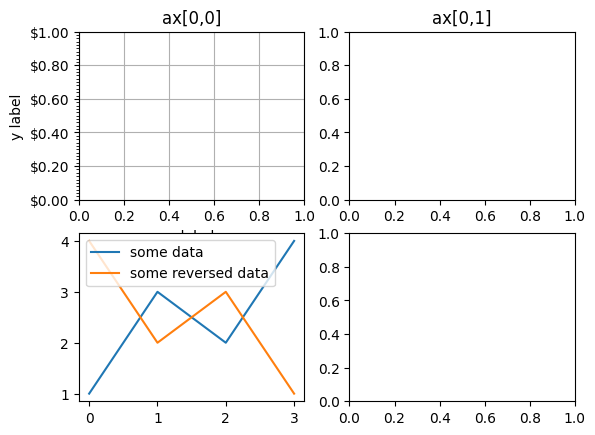

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator, MultipleLocator



x = [1, 3, 2, 4]
# plt.plot([1, 3, 2, 4])
# plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,1].set_title("ax[0,1]")
ax[0,0].set_title("ax[0,0]")

ax[1, 0].plot(x, label='some data')
ax[1, 0].plot(x[::-1], label='some reversed data')
ax[1, 0].legend(loc = 'upper left')
ax[0, 0].set_ylabel("y label")
ticker = ticker.FormatStrFormatter('$%1.2f')

ax[0, 0].yaxis.set_major_formatter(ticker)
ax[0, 0].yaxis.set_minor_locator(AutoMinorLocator(10))

ax[0, 0].set_xlabel("y label")


ax[0,0].grid()
# ax[]


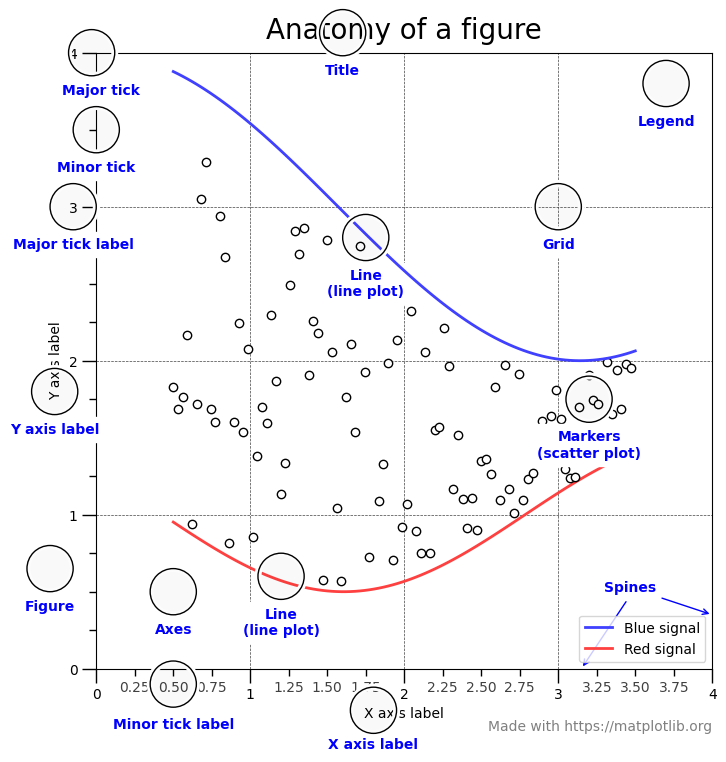

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return f"{x:.2f}"

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
# FuncFormatter is created and used automatically
ax.xaxis.set_minor_formatter(minor_tick)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with https://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

### Додавання заголовків, позначок осей та опису
Давайте перемалюємо цей графік, але тепер із заголовком, мітками осей та описом:

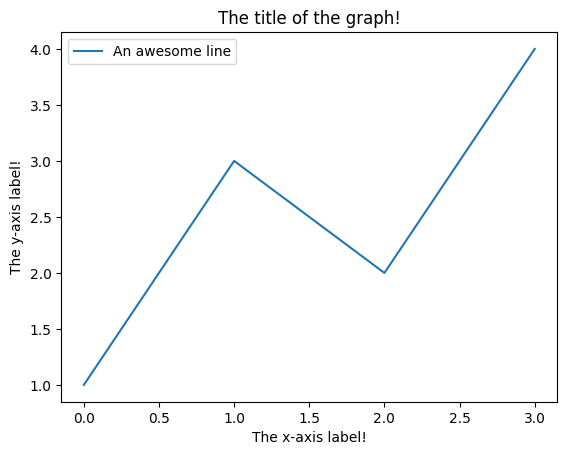

In [3]:
plt.plot([1, 3, 2, 4], label="An awesome line")  # створюємо графік з міткою

# мітки для горизонтальної та вертикальної осі
plt.ylabel('The y-axis label!')
plt.xlabel('The x-axis label!')

# заголовок
plt.title("The title of the graph!")

# додаємо всі мітки на графік
plt.legend()

# показуємо результат
plt.show()

### Додавання даних x і y

Якщо ви надаєте один аргумент для команди [plot()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot), matplotlib припускає, що це послідовність значень y, і автоматично генерує для вас значення x.

[plot()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) — це універсальна команда, яка прийматиме довільну кількість аргументів. Наприклад, щоб побудувати графік залежності x від y, можна ввести команду:

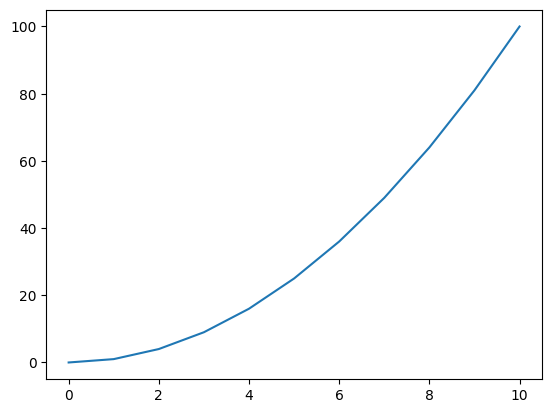

In [4]:
x_vals = [0,1, 2, 3, 4, 5,6,7,8,9,10]
y_vals = [0,1, 4, 9, 16,25,36,49,64,81,100]
plt.plot(x_vals, y_vals)
plt.show()

Ось ще один приклад з використанням NumPy:

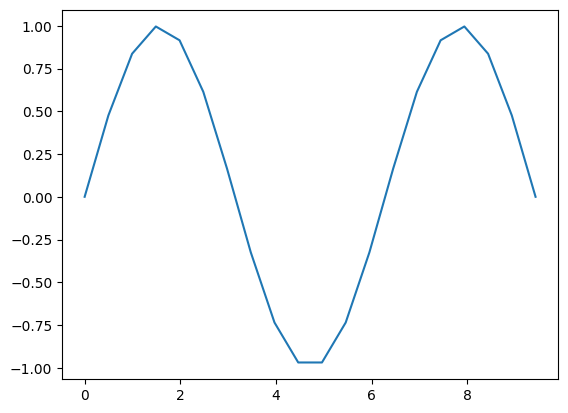

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.linspace(0, 3 * np.pi, 20)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

### Встановлення діапазонів осей
Ви можете встановити [xmin, xmax, ymin, ymax] графіка за допомогою команди [axis()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axis). Так, наприклад:

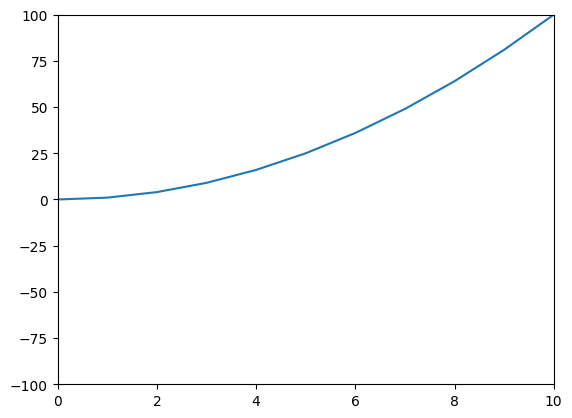

In [6]:
plt.plot(x_vals, y_vals)
plt.axis([0, 10, -100, 100])
plt.show()

### Зміна розміру графіку
Ми також можемо змінити розмір графіка за допомогою figsize. Це має бути кортеж виду (ширина, висота) у дюймах. Більше [тут](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html)

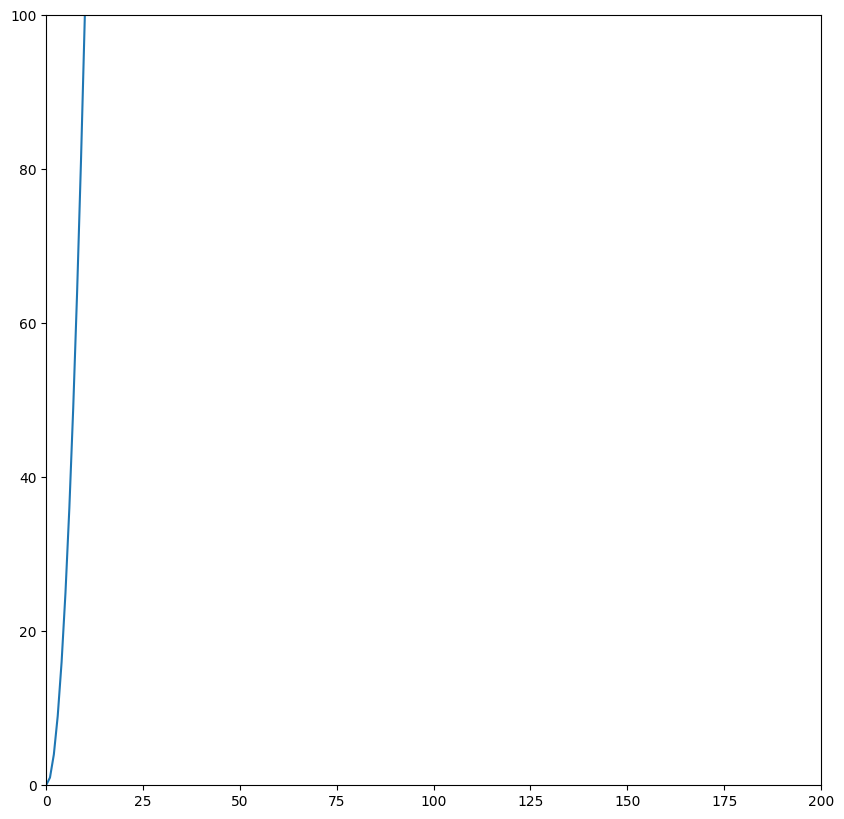

In [7]:
plt.figure(figsize=(10, 10))

plt.plot(x_vals, y_vals)
plt.axis([0, 200, 0, 100])
plt.show()

### Побудова кількох значень
Ви також можете накреслити кілька ліній:

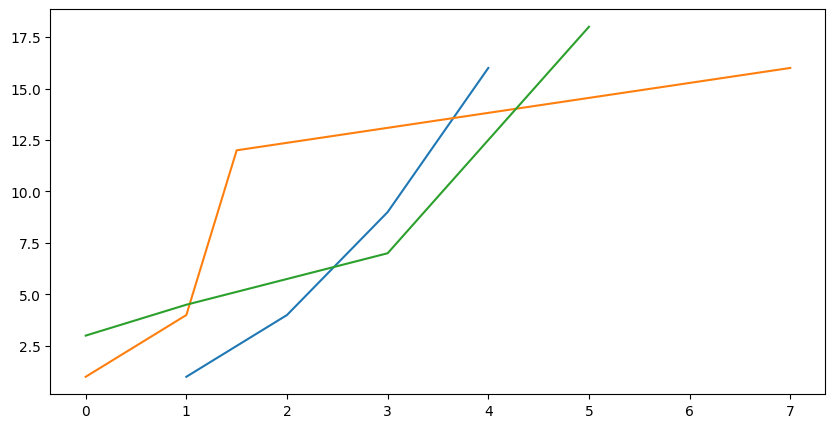

In [8]:
# setup the data
(x1_vals, y1_vals) = ([1,2,3,4], [1, 4, 9, 16])
(x2_vals, y2_vals) = ([0,1,1.5,7], [1,4,12,16])
(x3_vals, y3_vals) = ([0,1,3,5], [3,4.5,7,18])

# plot the data
plt.figure(figsize=(10, 5))

plt.plot(x1_vals, y1_vals)
plt.plot(x2_vals, y2_vals)
plt.plot(x3_vals, y3_vals)
plt.show()

Ще більш компактний спосіб зробити це:

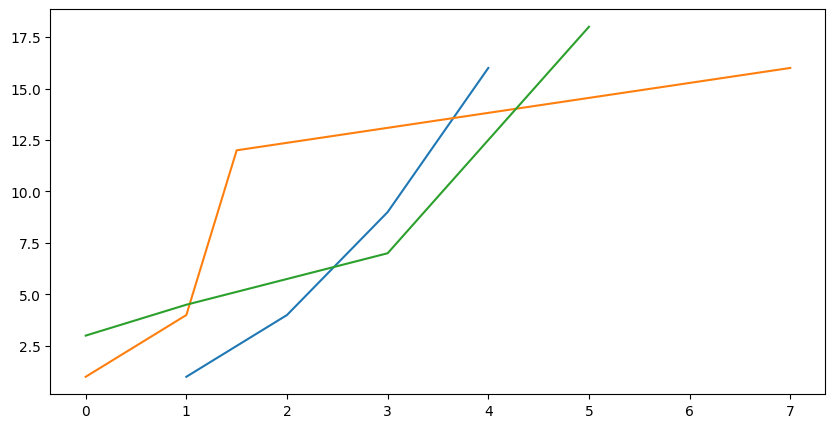

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(x1_vals, y1_vals, x2_vals, y2_vals, x3_vals, y3_vals)
plt.show()

And again with NumPy:

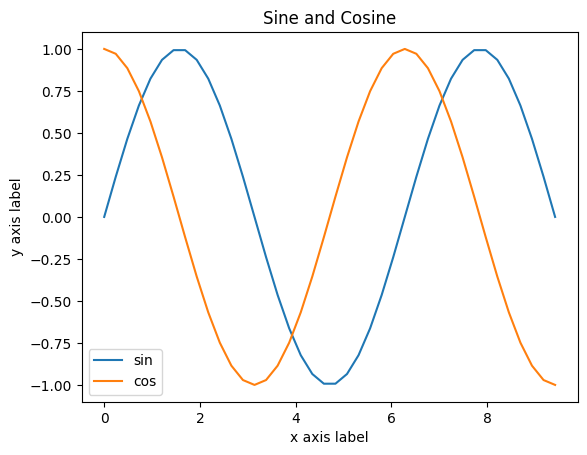

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.linspace(0, 3 * np.pi, 40)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin, label="sin")
plt.plot(x, y_cos, label="cos")
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')

plt.legend()
plt.show()

## Керування властивостями лінії
- https://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties
- https://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D

Лінії мають багато атрибутів, які можна встановити: ширину лінії, стиль тире, маркер, згладжування, альфа тощо; див. [matplotlib.lines.Line2D](https://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D).

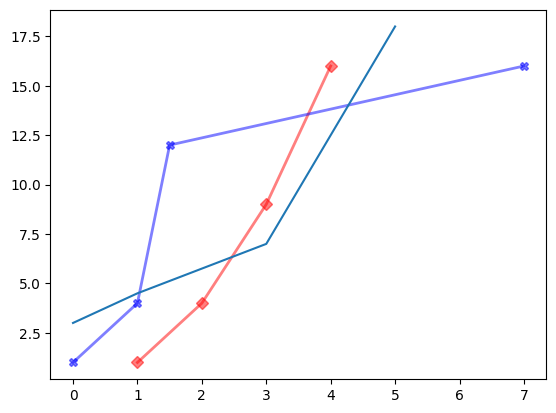

In [11]:
line1 = plt.plot(x1_vals, y1_vals, color='r', linewidth=2.0, marker='D', alpha=0.5)
line2 = plt.plot(x2_vals, y2_vals, color='b', linewidth=2.0, marker='X', alpha=0.5)
line3 = plt.plot(x3_vals, y3_vals)
plt.show()

## Побудова кількох діаграм

Ви можете створити кілька графіків в одній фігурі за допомогою [`subplot`](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html)

**Посилання:**
- https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
- https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html
- https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

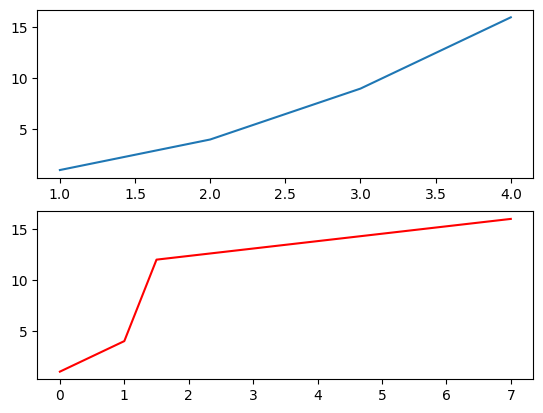

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# subplot додає до фігури підділяеки. Щоб встановити розташування підділянки,
# вкажіть трьохцифрове число, де перша цифра є кількістю рядків,
# друга кількість стовпців, а третя номер підділянки
# Наприклад, plt.subplot(211) посилається на діаграму з двома рядками з одним
# стовпцем і вибирає першу підділянку. Це еквівалентно
# plt.subplot(2,1,1).
# Документація https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
plt.subplot(211)
plt.plot(x1_vals, y1_vals)

plt.subplot(212)
plt.plot(x2_vals, y2_vals, 'r-') # the 'r-' colors the line red
plt.show()

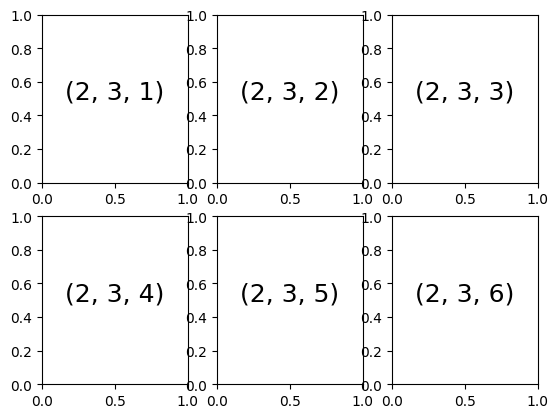

In [13]:
# From: https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html#plt.subplot:-Simple-Grids-of-Subplots
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

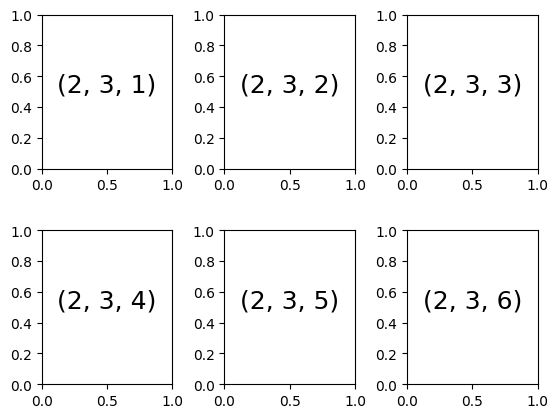

In [14]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Для більш складніших ситуацій

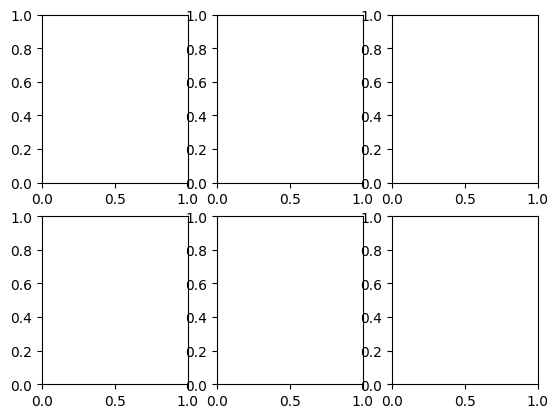

In [15]:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
fig, axes = plt.subplots(2, 3) # same as plt.subplots(nrows=2, ncols=3)

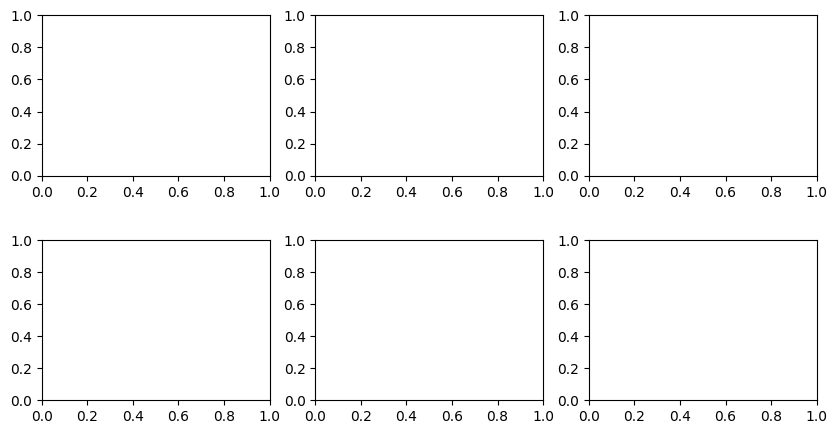

In [16]:
# We can make more room using figsize
fig, axes = plt.subplots(2, 3, figsize=(10,5))
fig.subplots_adjust(hspace=0.4) # add in more height between subplots

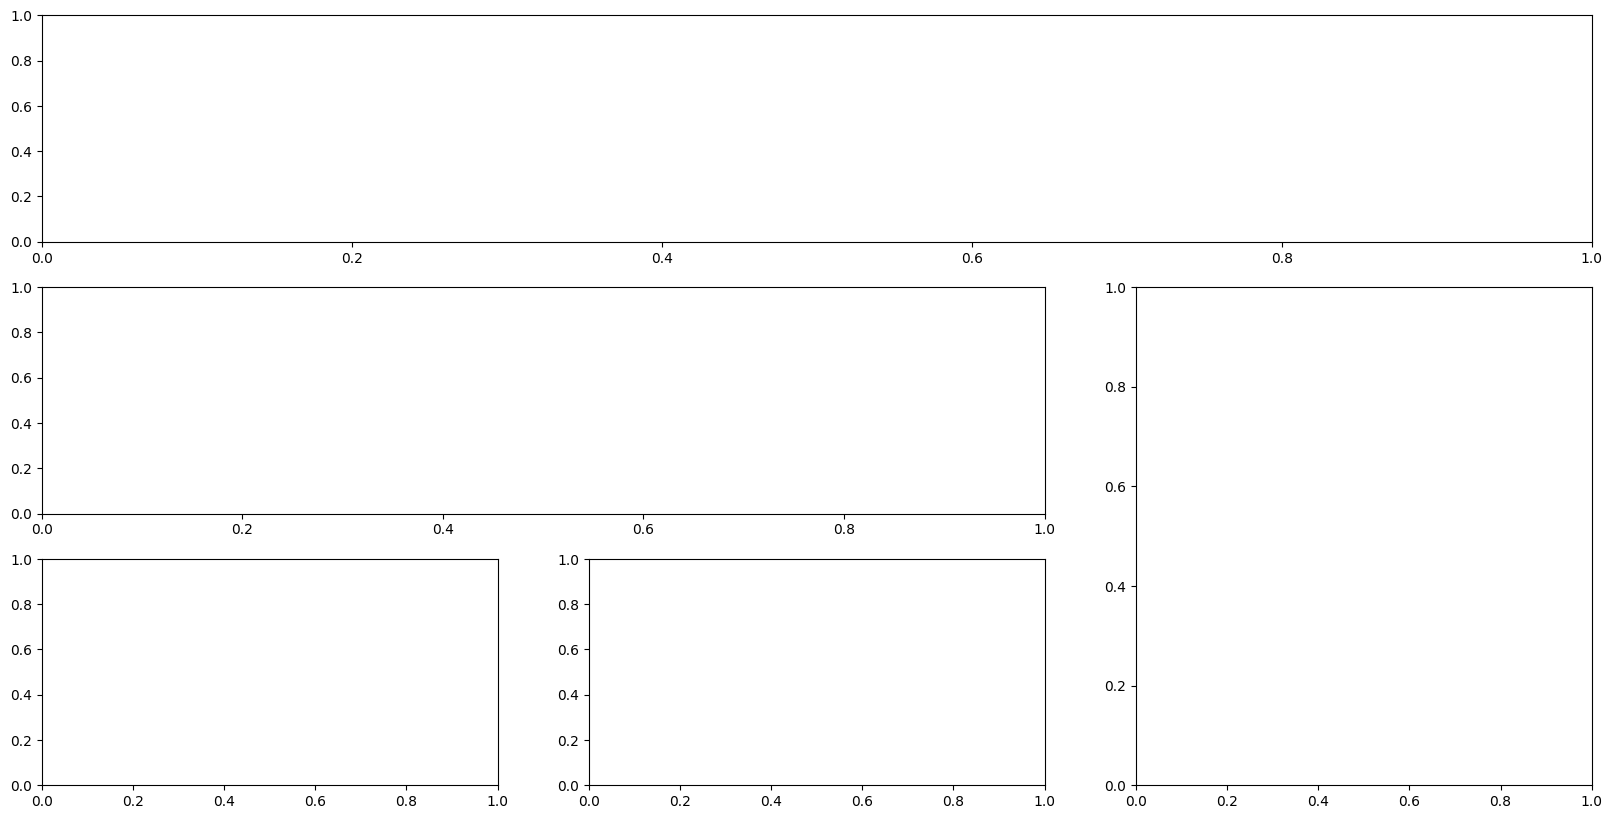

In [17]:
# Grid of different sizes
# See: https://matplotlib.org/users/gridspec.html
plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

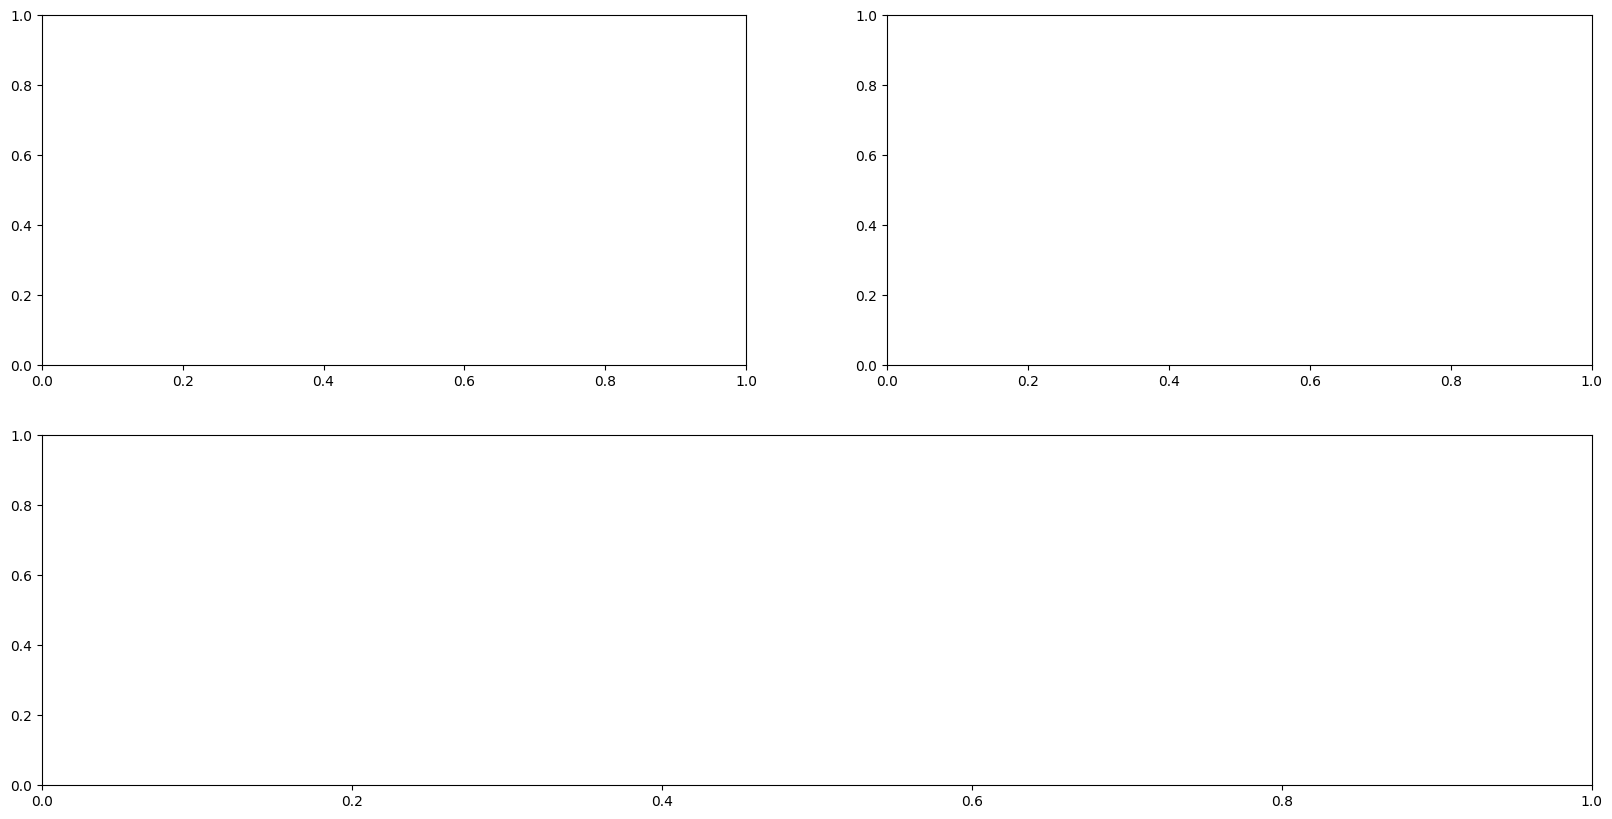

In [18]:
# Grid of different sizes
# See: https://matplotlib.org/users/gridspec.html
plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)



## Визначення кольорів, маркерів

### Кольори
- https://matplotlib.org/2.0.2/api/colors_api.html
- https://matplotlib.org/users/colors.html

Майже в усіх місцях matplotlib, де користувач може вказати колір, він може бути наданий як:

- кортеж RGB або RGBA з плаваючими значеннями в межах [0, 1] (наприклад, (0,1, 0,2, 0,5) або (0,1, 0,2, 0,5, 0,3))
- шістнадцятковий рядок RGB або RGBA (наприклад, '#0F0F0F' або '#0F0F0F0F')
- рядкове представлення значення з плаваючою точкою в [0, 1] включно для рівня сірого (наприклад, '0,5')
один із {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
- назва кольору X11/CSS4
- назва з огляду кольорів xkcd із префіксом «xkcd:» (наприклад, «xkcd:sky blue»)
- один із {'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'}
- один із {'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray ', 'tab:olive', 'tab:cyan'}, які є кольорами Tableau з категоричної палітри 'T10' (це колірний цикл за замовчуванням).

Для основних вбудованих кольорів можна використовувати одну букву

- b: синій
- g: зелений
- r: червоний
- c: блакитний
- m: пурпурний
- у: жовтий
- k: чорний
- w: білий

### Маркери
- https://matplotlib.org/api/markers_api.html

Існує багато різних маркерів, зокрема:

- "." точка
- "," піксель
- "о" кружечок
- "v" трикутник вниз
- "^" трикутник вверх
- "<" трикутник вліво
- ">" трикутник вправо
- "s" квадрат
- "p" п'ятикутник
- "P" плюс (заповнений)
- "*" зірочка
- "h" шестикутник1
- "Н" шестикутник2
- «+» плюс
- "x" x
- "X" x (заповнений)
- "D" ромб
- "d" тонкий діамант

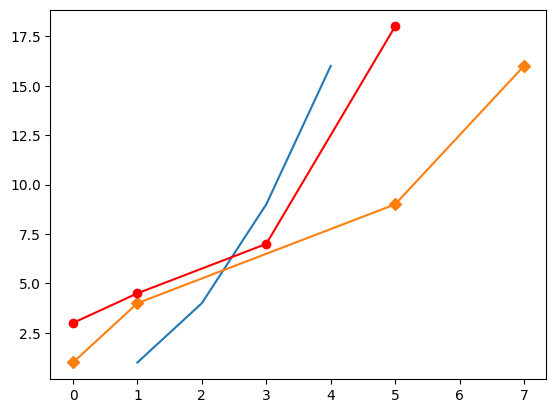

In [19]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16])
plt.plot([0,1,5,7], [1,4,9,16], 'D-')
plt.plot([0,1,3,5], [3,4.5,7,18], 'ro-')
plt.show()

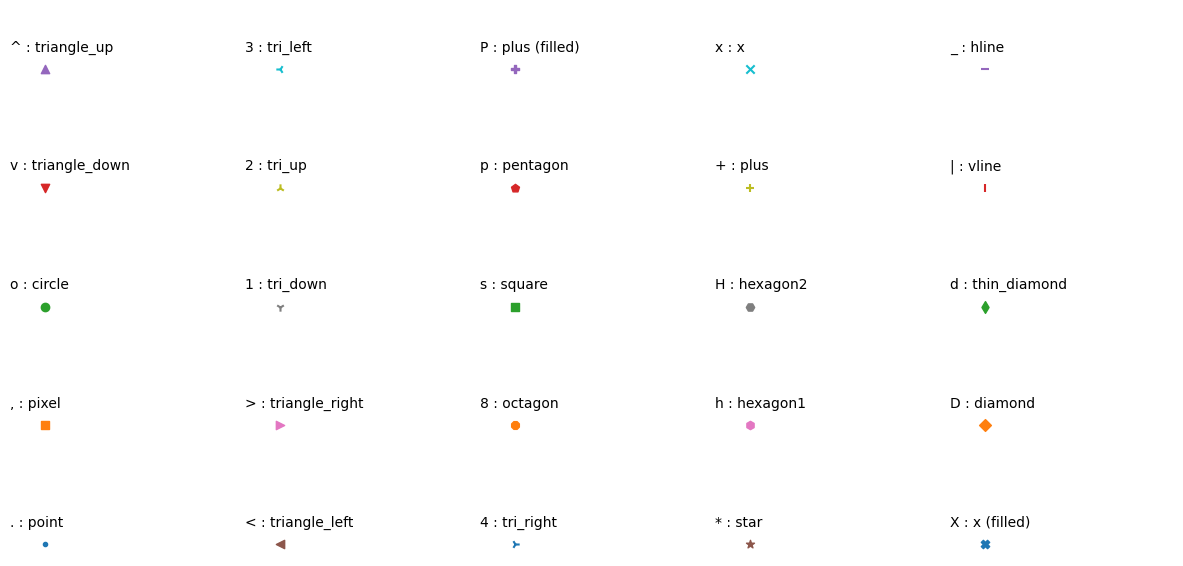

In [20]:
# Example of all markers
# From: https://stackoverflow.com/a/46637880
import matplotlib.pylab as plt
markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
descriptions=['point', 'pixel', 'circle', 'triangle_down', 'triangle_up','triangle_left', 'triangle_right', 'tri_down', 'tri_up', 'tri_left','tri_right', 'octagon', 'square', 'pentagon', 'plus (filled)','star', 'hexagon1', 'hexagon2', 'plus', 'x', 'x (filled)','diamond', 'thin_diamond', 'vline', 'hline']
x=[]
y=[]
for i in range(5):
    for j in range(5):
        x.append(i)
        y.append(j)
plt.figure(figsize=(12,6))
for i,j,m,l in zip(x,y,markers,descriptions):
    plt.scatter(i,j,marker=m)
    plt.text(i-0.15,j+0.15,s=m+' : '+l)
plt.axis([-0.1,4.8,-0.1,4.5])
plt.tight_layout()
plt.axis('off')
plt.show()